In [1]:
using SparseArrays, LinearAlgebra
#using Pkg
#Pkg.activate("../")
using Causality

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
┌ Warning: Package CRlibm does not have Libdl in its dependencies:
│ - If you have CRlibm checked out for development and have
│   added Libdl as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRlibm
└ Loading Libdl into CRlibm from project dependency, future warnings for CRlibm are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for IntervalArithmetic [d1acc4aa-44c8-5952-acd4-ba5d80a2a253]
│   exception = Required dependency CRlibm [96374032-68de-5a5b-8d9e-752f78720389] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: Package CRlibm does not have Libdl in its dependencies:
│ - If you have CRlibm checked out for development and have
│   added Libdl as a dependency but haven't updated your primary
│   environment's manifes

# Generation of Epidemics

In [4]:
T, N = 20.0, 200
#G = Causality.makeBarabasi(N,k=2)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,2.05/N)
G.A 

200×200 SparseMatrixCSC{IndexedGraphs.NullNumber, Int64} with 1174 stored entries:
⠠⠆⠀⠷⠂⡈⠠⠀⠀⢀⠂⠑⠀⢀⣂⢶⡀⠰⡔⠨⡈⠉⠀⠡⢄⠈⠀⠀⠰⣇⡑⠈⠂⠠⠀⠀⠊⠄⠆⠐
⢤⡄⠀⠀⠅⠀⡁⠁⠐⠀⠀⠃⢀⢀⠄⣤⠈⢨⡀⠁⠄⠌⠁⠂⠆⠄⠉⠀⢅⡂⠀⠀⢀⣁⠂⠁⠠⡈⡌⠀
⡈⠠⠁⠁⠊⠀⠀⡀⠨⠸⢄⠠⠁⠜⠡⠠⠊⠄⠔⢁⠄⠋⢁⠀⠐⠁⠀⡠⠀⠠⡀⡀⠀⠀⠀⠀⠋⠀⠈⠂
⠀⠂⠅⠈⠀⠠⠀⠀⠊⠂⠀⠁⠈⠈⠈⢀⠊⢠⠂⠙⡈⠀⠢⣂⢁⡀⠅⠃⠈⠀⠒⡆⢈⡘⠃⣔⠀⠃⢑⠀
⠀⢀⠐⠀⣂⡂⠪⠀⠀⠀⢂⠂⢀⢤⠒⢀⠀⠀⡔⠀⡀⡐⡄⠀⢂⢈⠖⠉⠀⠀⡆⠀⠂⠀⠤⠀⢁⢀⠀⡀
⢌⠀⠤⠀⠀⡑⠄⠀⠨⠐⡐⠈⢀⠀⠀⠀⠀⠀⠈⠐⡠⠲⢀⠀⠄⠢⠀⠠⠅⠔⢈⢀⡁⠀⢀⠀⢑⠀⠀⢌
⠀⢀⠀⢐⣁⠄⡂⠀⠀⣔⠀⠐⠪⠂⡀⢀⡈⠀⠐⢋⠀⡀⠀⠀⠀⡀⠄⠁⢀⡀⠀⠄⠐⢀⠠⠀⡐⡚⠘⡀
⢨⣜⠀⣥⠁⡂⠂⢀⠘⢀⠀⠀⠀⢈⢐⡰⡁⢠⠈⠀⠀⡂⠀⠀⢊⡁⠂⠐⢤⣕⠁⠀⠂⡀⠀⣠⠁⠄⡄⠀
⢀⡈⡂⣀⠊⠄⠊⣀⠀⠀⠀⠀⠂⠈⠁⣈⠔⠁⠐⠊⠐⡁⠆⠠⠈⡀⠀⠅⢀⠁⢀⠁⠈⠨⠢⡩⠀⠁⡒⠀
⡐⡉⠄⠈⠔⢁⣌⠀⠐⠉⢂⠀⡴⢀⠂⠀⡰⠀⡠⠎⢁⠀⠄⠀⠐⠈⠘⡀⢀⢀⠀⡀⠂⢈⠇⢀⡂⡁⠠⠑
⡆⠈⡀⠅⡤⠁⠂⠈⢀⠨⢠⡊⠀⠠⠠⠠⠔⠠⠁⠐⠀⡠⠀⠁⡀⠅⠈⠀⡁⠴⠀⠂⠈⡁⠂⠈⠠⠀⠒⠀
⠄⡀⠡⠀⠁⠐⠨⢢⠀⠉⠀⠐⠀⠀⠀⠀⠈⡁⠀⠁⠄⠀⡀⡨⠌⢤⠀⠂⠄⠄⢍⠲⠀⠄⢈⢨⠐⠈⢌⠁
⡀⠑⠈⠅⠔⠀⠁⠰⡈⢐⠠⡁⠀⠠⠎⠰⠂⠠⡐⠀⠄⠌⠂⣅⡁⠈⠁⢄⠥⡂⡂⢀⠀⠤⠀⠴⠠⠀⠀⡃
⠀⠀⠃⠀⠀⡠⠥⠁⡜⠁⠀⡀⠄⠁⢈⠀⠄⠄⠒⠠⠂⠀⠠⠀⠁⢄⠀⠀⠂⡀⠀⠄⡢⠢⠘⠥⠄⠼⠀⢀
⠴⢦⠡⠱⠀⡀⠂⠀⠀⠀⢁⠅⠀⠰⢄⢷⠄⠐⠀⢐⢁⡌⠀⠅⠡⠣⠈⠠⠠⠂⠄⠠⡀⠑⠄⠈⠂⠂⠆⠉
⡑⠈⠀⠀⠀⠨⠸⠤⠈⠉⠂⢐⠀⠄⠁⠀⠄⠐⠀⠠⠠⠀⢣⡑⠈⢈⠀⠄⠀⡁⡄⠉⠢⠠⠐⠔⢀⠄⠐⠑
⠈⡀⠄⢰⠀⠀⣂⠰⠈⠀⠁⠈⠐⢀⠈⠠⡂⡀⡈⢀⠆⠠⠀⠄⠀⡄⠨⡊⢄⠈⠈⡂⢠⠒⠀⣢⡁⡢⠀⠈
⠀⠀⠌⠀⠀⠀⢉⢤⠀⠃⠀⠐⠀⠂⠀⣠⡌⡢⠉⢁⡈⠀⡂⣐⢀⡄⠖⡄⡀⠁⢐⠄⠠⣠⢀⠐⠐⠀⢙⡀
⠊⠄⡀⠢⠋⠀⠤⠀⠁⢐⠑⠐⣰⠨⠁⠄⠄⠀⠌⠨⠀⠂⡐⠀⠀⠂⣀⡅⠨⠀⠀⠔⠡⡨⠐⠀⢀⠐⠀⠈
⢈⠁⠂⠉⠢⠀⠑⠐⠀⠠⡀⢄⠒⠠⠀⠉⠘⠈⢄⠂⠘⠀⠆⠑⠤⠠⠀⢀⡌⠁⢔⠀⡀⠀⠓⠰⡀⠀⠊⠀

In [5]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [6]:
#Initialize generation parameters
ε = 1e-10
λ = 0.2
pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, T/2, 1/ε)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [7]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [8]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

In [16]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);

xtrue = zeros(N)
sample!(xtrue)
nobs, p = 100, 1e-5
#nobs, p = N, 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
sum(xtrue .< T)

168

## Causality (with inference of Infection Hyperparameter)

In [18]:
#Softened model
T = Float64(T)
ε = 1e-3
autoinf = GaussianRate(ε, T/2, T);
inf_out = GaussianRate(1/2, T/2, 3*T)
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);

In [19]:
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen);

In [21]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=2000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.1),learnhyper=1);
F = descend!(Mp2, O; M=M, numsamples=2000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
         hyperdescender=SignDescender(0.02),learnhyper=1);
F

Progress: 100%|█████████████████████████████████████████| Time: 0:02:53
  F:  61.52874763580482


61.52874763580482

In [22]:
Mp.θgen

1×7 Matrix{Float64}:
 0.005  1.0e-10  10.0  1.0e10  0.2  10.0  1.0e10

In [23]:
M.θgen

1×7 Matrix{Float64}:
 0.005  0.001  10.0  20.0  0.155852  10.0  20.0

In [24]:
statscauHyper = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


## Causality (without inference of Hyperparameters)

In [25]:
#Softened model
T = Float64(T)
ε = 1e-3
autoinf = GaussianRate(ε, T/2, T);
inf_out = GaussianRate(λ, T/2, 3*T)
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);

In [26]:
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen);

In [27]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=2000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.),learnhyper=1);
F = descend!(Mp2, O; M=M, numsamples=2000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.02),
         hyperdescender=SignDescender(0.),learnhyper=1);
F

Progress: 100%|█████████████████████████████████████████| Time: 0:03:13
  F:  59.85671604629056


59.85671604629056

In [28]:
statscau = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02



## Marginals and ROC curve

In [29]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

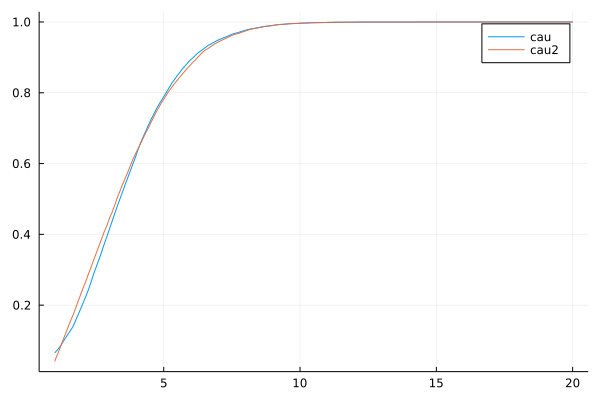

In [30]:
#Marginals
bins = 10 * Int(T)
using Plots
p_cau = zeros(N,bins)
p_cauHyper = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_cauHyper[i,t] = marginal(i, t*T/bins, statscauHyper)
    end
end
i = 4
plot(LinRange(1,Int(T),bins),p_cau[i,:], label = "cau")
plot!(LinRange(1,Int(T),bins),p_cauHyper[i,:], label = "cauHyper")

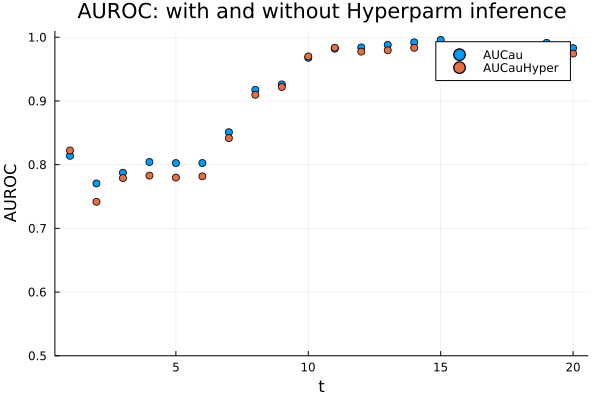

In [34]:
#AUROC curves

T = Int(T)
AU_curve=zeros(T)
AU_curveHyper=zeros(T)
for t = 1:T
    cau_risk=zeros(N)
    cau_Hyper=zeros(N)
    for i=1:N
       cau_risk[i] = marginal(i,t,statscau)
       cau_Hyper[i] = marginal(i,t,statscauHyper)
    end
    xt = xtrue .< t
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_curveHyper[t] = AUROC(ROC(xt, cau_Hyper))
end

scatter(LinRange(1,T,T),AU_curve, label="AUCau", title="AUROC: with and without Hyperparm inference")
scatter!(LinRange(1,T,T),AU_curveHyper, label="AUCauHyper" )
xlabel!("t")
ylabel!("AUROC")
savefig("confronti.pdf")
ylims!(0.5,1.01)